## Watermarking Tool

In [1]:
import requests
from PIL import Image
import numpy as np
import cv2


#### Getting Images

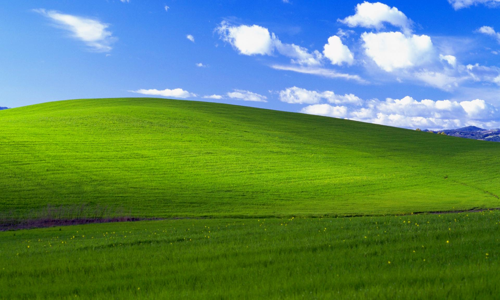

In [2]:
# Getting Image
img = Image.open(requests.get(
    'https://virtualbackgrounds.site/wp-content/uploads/2020/07/windows-xp-wallpaper-bliss.jpg', stream=True).raw)
img.resize((500, 300))


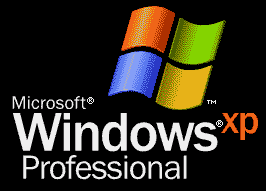

In [3]:
# Getting Logo
wm_img = Image.open(requests.get(
    'https://c2techs.net/wp-content/uploads/2014/02/XP-logo.png', stream=True).raw)
wm_img = wm_img.convert('RGB')
wm_img


#### Converting Images into arrays

In [4]:
img = np.array(img)
img_2 = img.copy()
wm_img = np.array(wm_img)


#### Find Region of Interest in original image

In [5]:
img_h, img_w, _ = img.shape
wm_img_h, wm_img_w, _ = wm_img.shape

top_y = int(img_h / 2) - int(wm_img_h / 2)
left_x = int(img_w / 2) - int(wm_img_w / 2)
bottom_y = top_y + wm_img_h
right_x = left_x + wm_img_w

roi = img[top_y: bottom_y, left_x: right_x]


#### Replace ROI with watermark

In [6]:
wm_img = cv2.addWeighted(roi, 1, wm_img, 1, 0)
img[top_y: bottom_y, left_x: right_x] = wm_img


#### Results

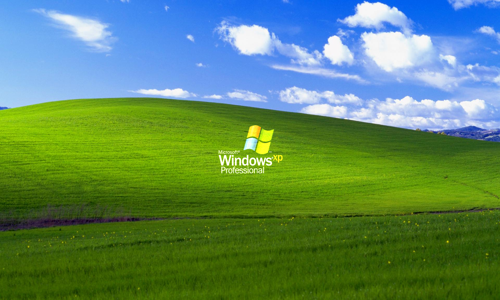

In [7]:
img = Image.fromarray(img)
img.resize((500, 300))


#### Text Watermark

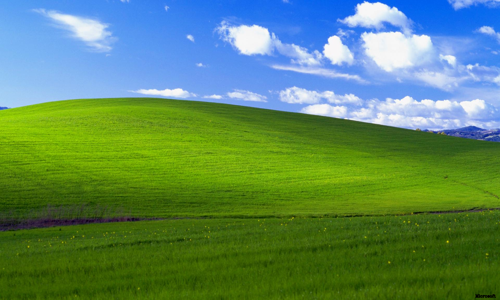

In [8]:
cv2.putText(img_2, text='Microsoft', org=(img_w - 95, img_h - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5,
            color=(0, 0, 0), thickness=2, lineType=cv2.LINE_4)
img_2 = Image.fromarray(img_2)
img_2.resize((500, 300))
